# Final Project

In [30]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, make_scorer, precision_score, confusion_matrix, classification_report


In [31]:
# Loading Data
data = pd.read_csv('Data/MoodDisorders.csv')
data

/var/folders/56/tnhxjt8155z651mvyxr0m9_w0000gn/T/ipykernel_61413/2842005565.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/MoodDisorders.csv')


,PersonNum,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Person-1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Person-2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Person-3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Person-4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Person-5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_dimension = data.shape
data_dimension

(1048575, 19)

In [33]:
# Exploratory Data Analysis
# Remove identifiable features to preserve privacy
data.drop(['PersonNum'], axis=1, inplace=True)

In [34]:
# Data Dimension

data.shape

(1048575, 18)

In [35]:
# Data Types
data.dtypes

Sadness             object
Euphoria            object
Exhaustion          object
Sleeplessness       object
MoodSwing           object
SuicidalThoughts    object
Anorxia             object
Disobedience        object
JustifyBehavior     object
Aggressiveness      object
MoveOn              object
NervousBreakdown    object
AdmitMistakes       object
Overthinking        object
SexualActivity      object
Concentration       object
Optimisim           object
Diagnosis           object
dtype: object

In [36]:
# Converting scale-based features from 'object' to numerical values
def extract_numerical(value):
    if pd.isnull(value):
        return np.nan
    try:
        return int(value.split()[0])
    except ValueError:
        return np.nan

data['SexualActivity'] = data['SexualActivity'].apply(extract_numerical)
data['Concentration'] = data['Concentration'].apply(extract_numerical)
data['Optimisim'] = data['Optimisim'].apply(extract_numerical)


In [37]:

# Updated data types after conversion
data.dtypes

Sadness              object
Euphoria             object
Exhaustion           object
Sleeplessness        object
MoodSwing            object
SuicidalThoughts     object
Anorxia              object
Disobedience         object
JustifyBehavior      object
Aggressiveness       object
MoveOn               object
NervousBreakdown     object
AdmitMistakes        object
Overthinking         object
SexualActivity      float64
Concentration       float64
Optimisim           float64
Diagnosis            object
dtype: object

In [38]:
# Summary Statistics

data.describe(include='all')

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
count,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240.000000,240.00000,240.000000,240
unique,4,4,4,4,2,3,2,2,2,2,2,2,2,2,NaN,NaN,NaN,4
top,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NaN,NaN,NaN,Bipolar Type-2
freq,84,92,76,88,126,126,148,146,126,124,140,124,122,130,NaN,NaN,NaN,62
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.741667,4.25000,4.466667,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.006249,1.79376,1.987127,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.00000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.00000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.00000,6.000000,NaN


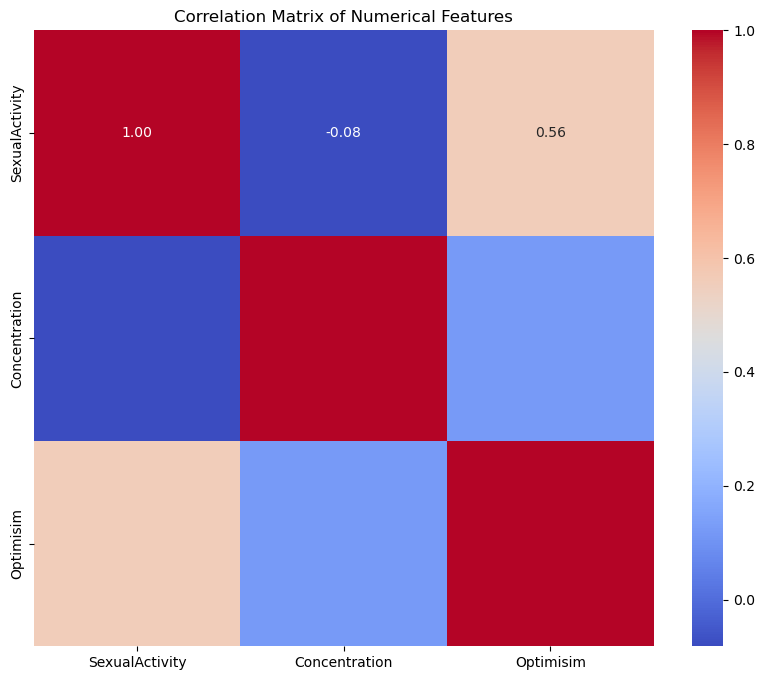

In [39]:
# Correlation plots for numerical features

numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

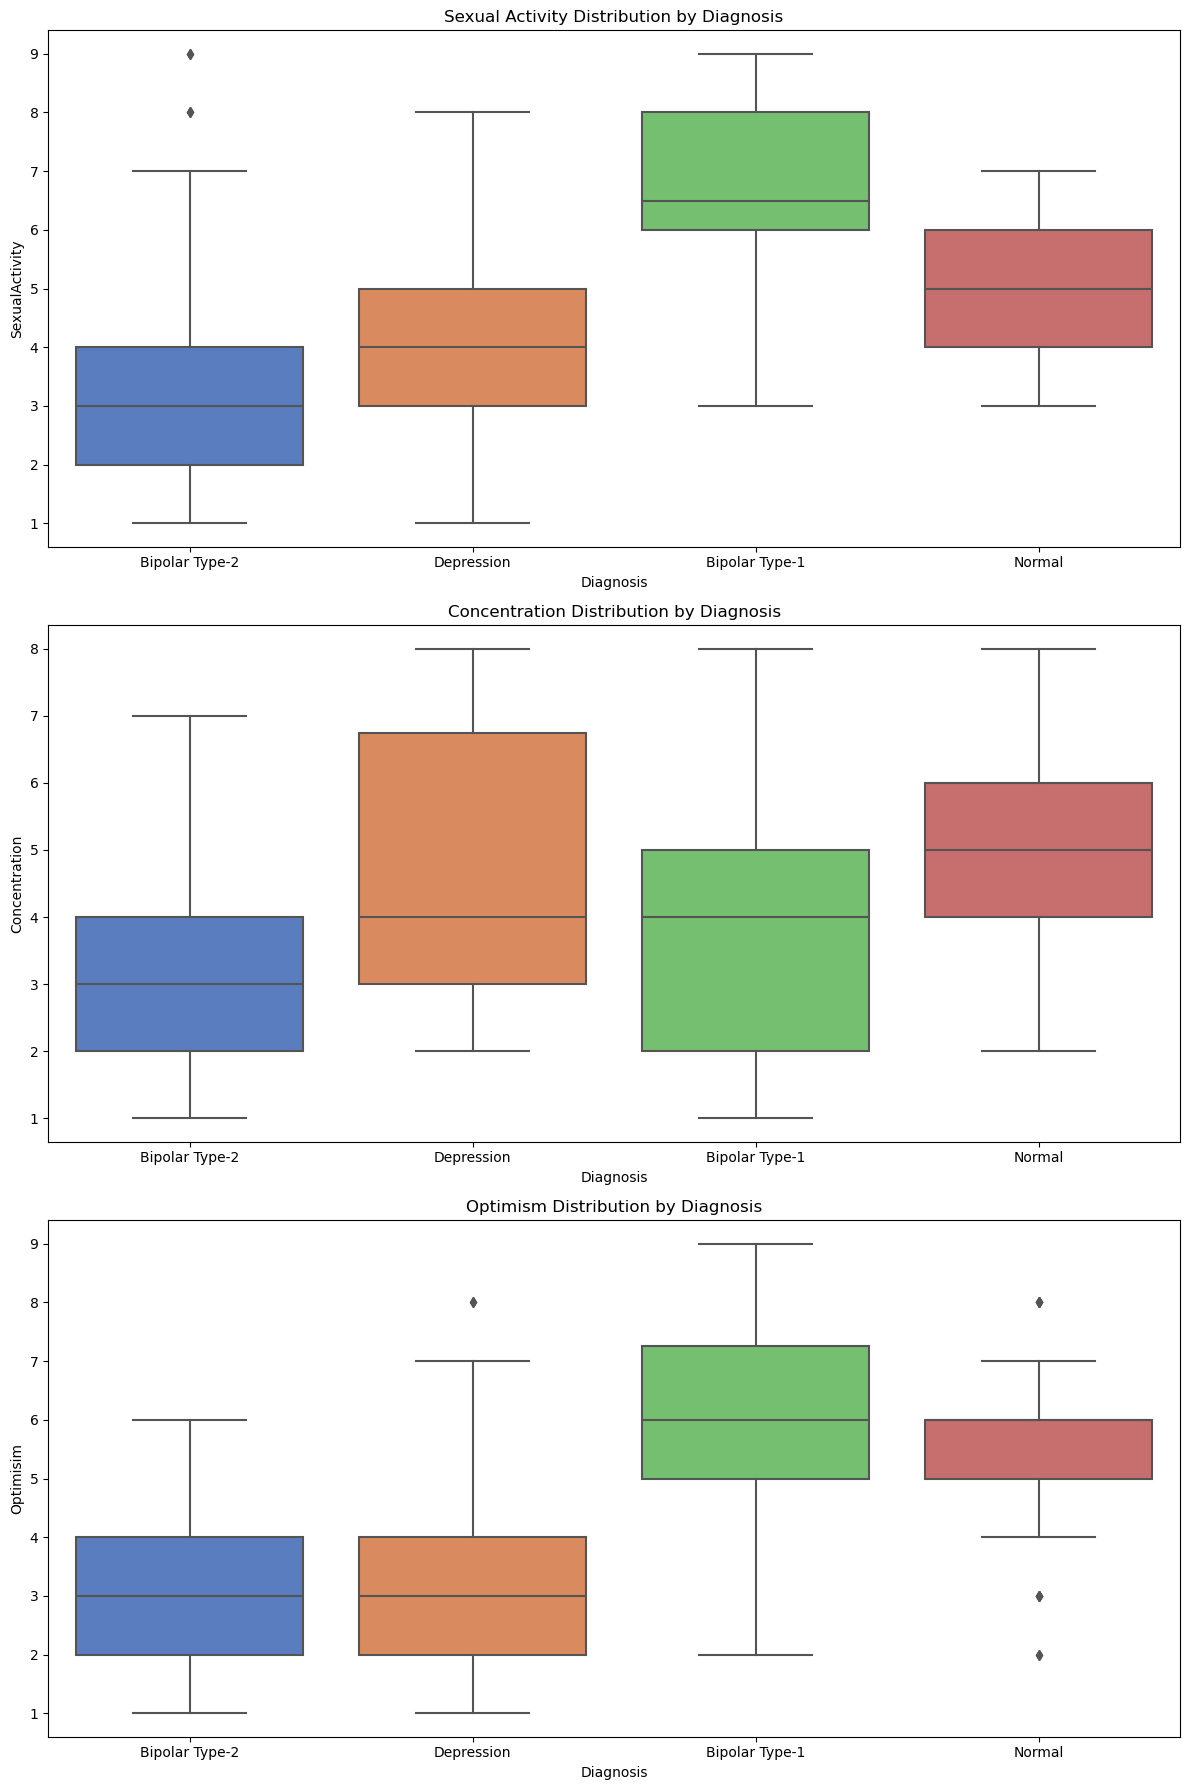

In [40]:
# Features against Target variable 'Diagnosis'

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for 'SexualActivity'
sns.boxplot(ax=axes[0], x='Diagnosis', y='SexualActivity', data=data, palette='muted')
axes[0].set_title('Sexual Activity Distribution by Diagnosis')

# Plot for 'Concentration'
sns.boxplot(ax=axes[1], x='Diagnosis', y='Concentration', data=data, palette='muted')
axes[1].set_title('Concentration Distribution by Diagnosis')

# Plot for 'Optimisim'
sns.boxplot(ax=axes[2], x='Diagnosis', y='Optimisim', data=data, palette='muted')
axes[2].set_title('Optimism Distribution by Diagnosis')

plt.tight_layout()
plt.show()

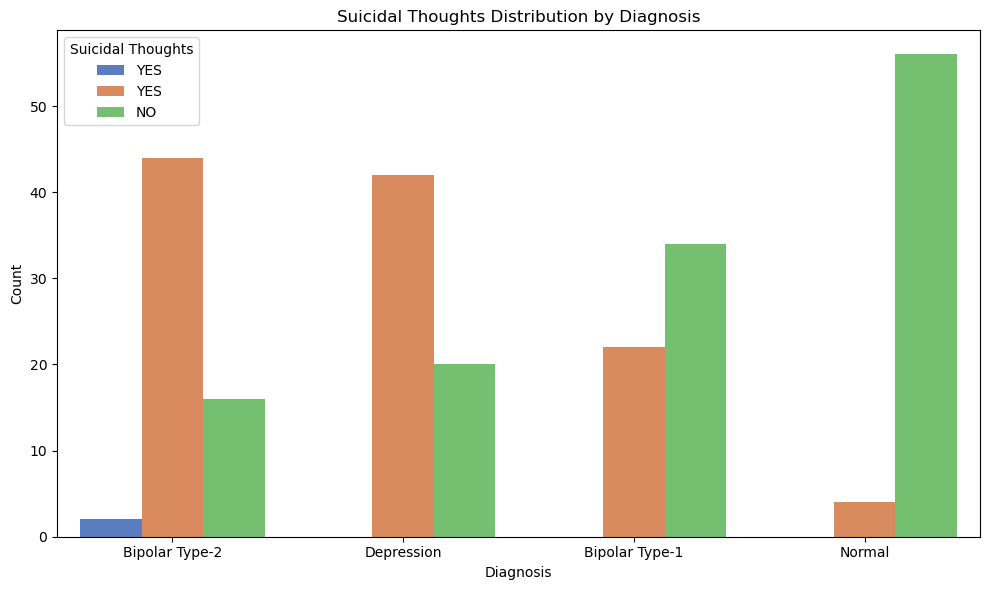

In [41]:
# Creating the figure for the count plot
plt.figure(figsize=(10, 6))

# Plot for 'SuicidalThoughts' distribution by 'Diagnosis'
sns.countplot(x='Diagnosis', hue='SuicidalThoughts', data=data, palette='muted')
plt.title('Suicidal Thoughts Distribution by Diagnosis')
plt.ylabel('Count')
plt.legend(title='Suicidal Thoughts')

plt.tight_layout()
plt.show()


* Suicidal Thoughts Distribution by Diagnosis:
    * This data requires to be cleaned, it shows "YES" as a response two times instead of only one.


In [42]:
# Data Pre-Processing and Wrangling

data.describe(include='all')

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
count,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240.000000,240.00000,240.000000,240
unique,4,4,4,4,2,3,2,2,2,2,2,2,2,2,NaN,NaN,NaN,4
top,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NaN,NaN,NaN,Bipolar Type-2
freq,84,92,76,88,126,126,148,146,126,124,140,124,122,130,NaN,NaN,NaN,62
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.741667,4.25000,4.466667,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.006249,1.79376,1.987127,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.00000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.00000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.00000,6.000000,NaN


In [43]:
# Suicidal thoughts column clean
unique_values_suicidal_thoughts = data['SuicidalThoughts'].unique()

data['SuicidalThoughts'] = data['SuicidalThoughts'].str.strip().str.upper()
corrected_unique_values = data['SuicidalThoughts'].unique()

unique_values_suicidal_thoughts, corrected_unique_values


(array(['YES ', 'YES', 'NO', nan], dtype=object),
 array(['YES', 'NO', nan], dtype=object))

In [44]:
# Cleaning null values

missing_values = data.isnull().sum()
print(f'Missing values (nulls):')
print(missing_values)


Missing values (nulls):
Sadness             1048335
Euphoria            1048335
Exhaustion          1048335
Sleeplessness       1048335
MoodSwing           1048335
SuicidalThoughts    1048335
Anorxia             1048335
Disobedience        1048335
JustifyBehavior     1048335
Aggressiveness      1048335
MoveOn              1048335
NervousBreakdown    1048335
AdmitMistakes       1048335
Overthinking        1048335
SexualActivity      1048335
Concentration       1048335
Optimisim           1048335
Diagnosis           1048335
dtype: int64


In [45]:
# Finding non null values

non_null_counts = data.notnull().sum()

print(f'Non null values:')
print(non_null_counts)

Non null values:
Sadness             240
Euphoria            240
Exhaustion          240
Sleeplessness       240
MoodSwing           240
SuicidalThoughts    240
Anorxia             240
Disobedience        240
JustifyBehavior     240
Aggressiveness      240
MoveOn              240
NervousBreakdown    240
AdmitMistakes       240
Overthinking        240
SexualActivity      240
Concentration       240
Optimisim           240
Diagnosis           240
dtype: int64


In [46]:
# Dropping null values


data_dimension = data.shape

data_cleaned = data.dropna(how='all')
data_dimension_cleaned = data_cleaned.shape

print(data_dimension)
print(data_dimension_cleaned)

(1048575, 18)
(240, 18)


In [47]:
data = data_cleaned.copy()
data.shape

(240, 18)

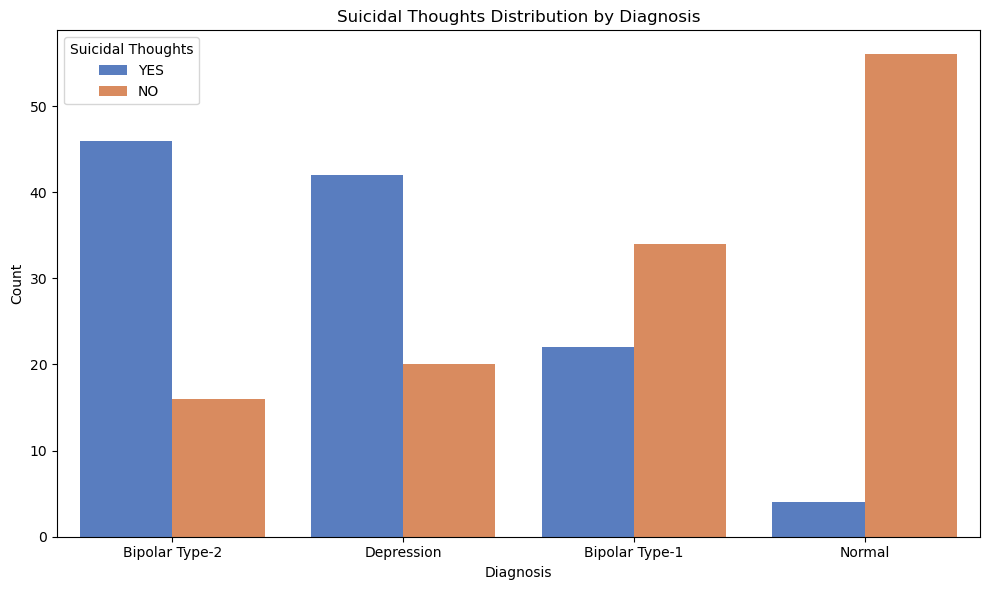

In [48]:
# Corrected Plot for 'SuicidalThoughts' distribution by 'Diagnosis'
plt.figure(figsize=(10, 6))


# Plot for 'SuicidalThoughts' distribution by 'Diagnosis'
sns.countplot(x='Diagnosis', hue='SuicidalThoughts', data=data, palette='muted')
plt.title('Suicidal Thoughts Distribution by Diagnosis')
plt.ylabel('Count')
plt.legend(title='Suicidal Thoughts')


plt.tight_layout()
plt.show()



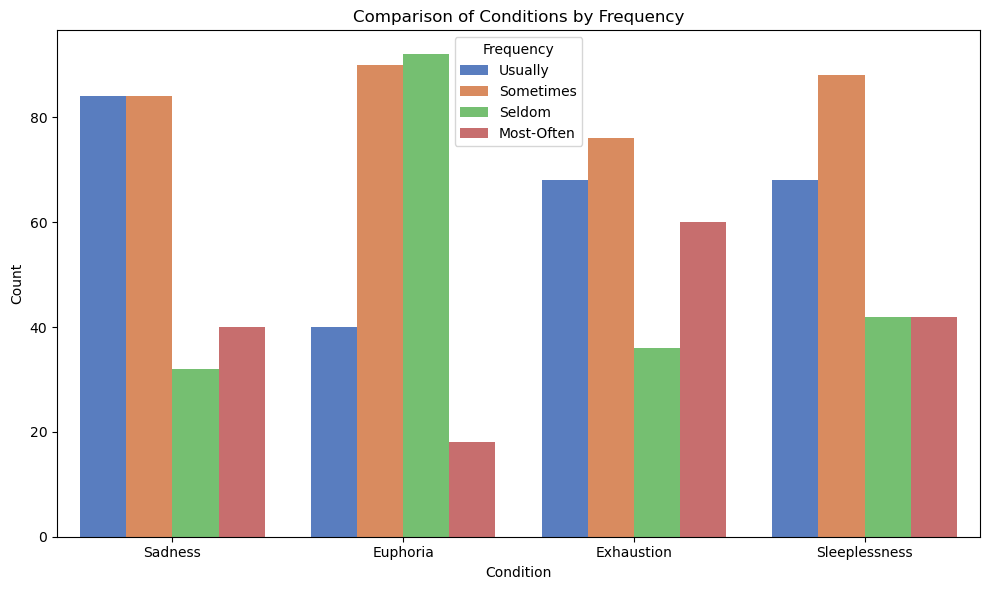

In [49]:

# Columns that include similar categories
df_long = pd.melt(data, value_vars=['Sadness', 'Euphoria', 'Exhaustion', 'Sleeplessness'], var_name="Condition", value_name="Frequency")

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_long, x='Condition', hue='Frequency', palette='muted')
plt.title('Comparison of Conditions by Frequency')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Frequency')
plt.tight_layout()
plt.show()


In [50]:
# Data Cleaning for Sadness, Euphoria, Exhaustion, and Sleeplessness
'''
These columns have 4 answers that could be categorized into two:

1. Category 1: Frequent Ocurrence
    * Usually 
    * Most-Often
2. Category 2: Infrequent Ocurrence
    * Sometimes
    * Seldom
'''

def categorize_occurrence(value):
    if value in ['Usually', 'Most-Often']:
        return 'Frequent occurrence'
    elif value in ['Sometimes', 'Seldom']:
        return 'Infrequent occurrence'
    else:
        return value  # For handling any unexpected values

# Columns to recategorize
columns_to_recat = ['Sadness', 'Euphoria', 'Exhaustion', 'Sleeplessness']
for column in columns_to_recat:
    data[column] = data[column].apply(categorize_occurrence)

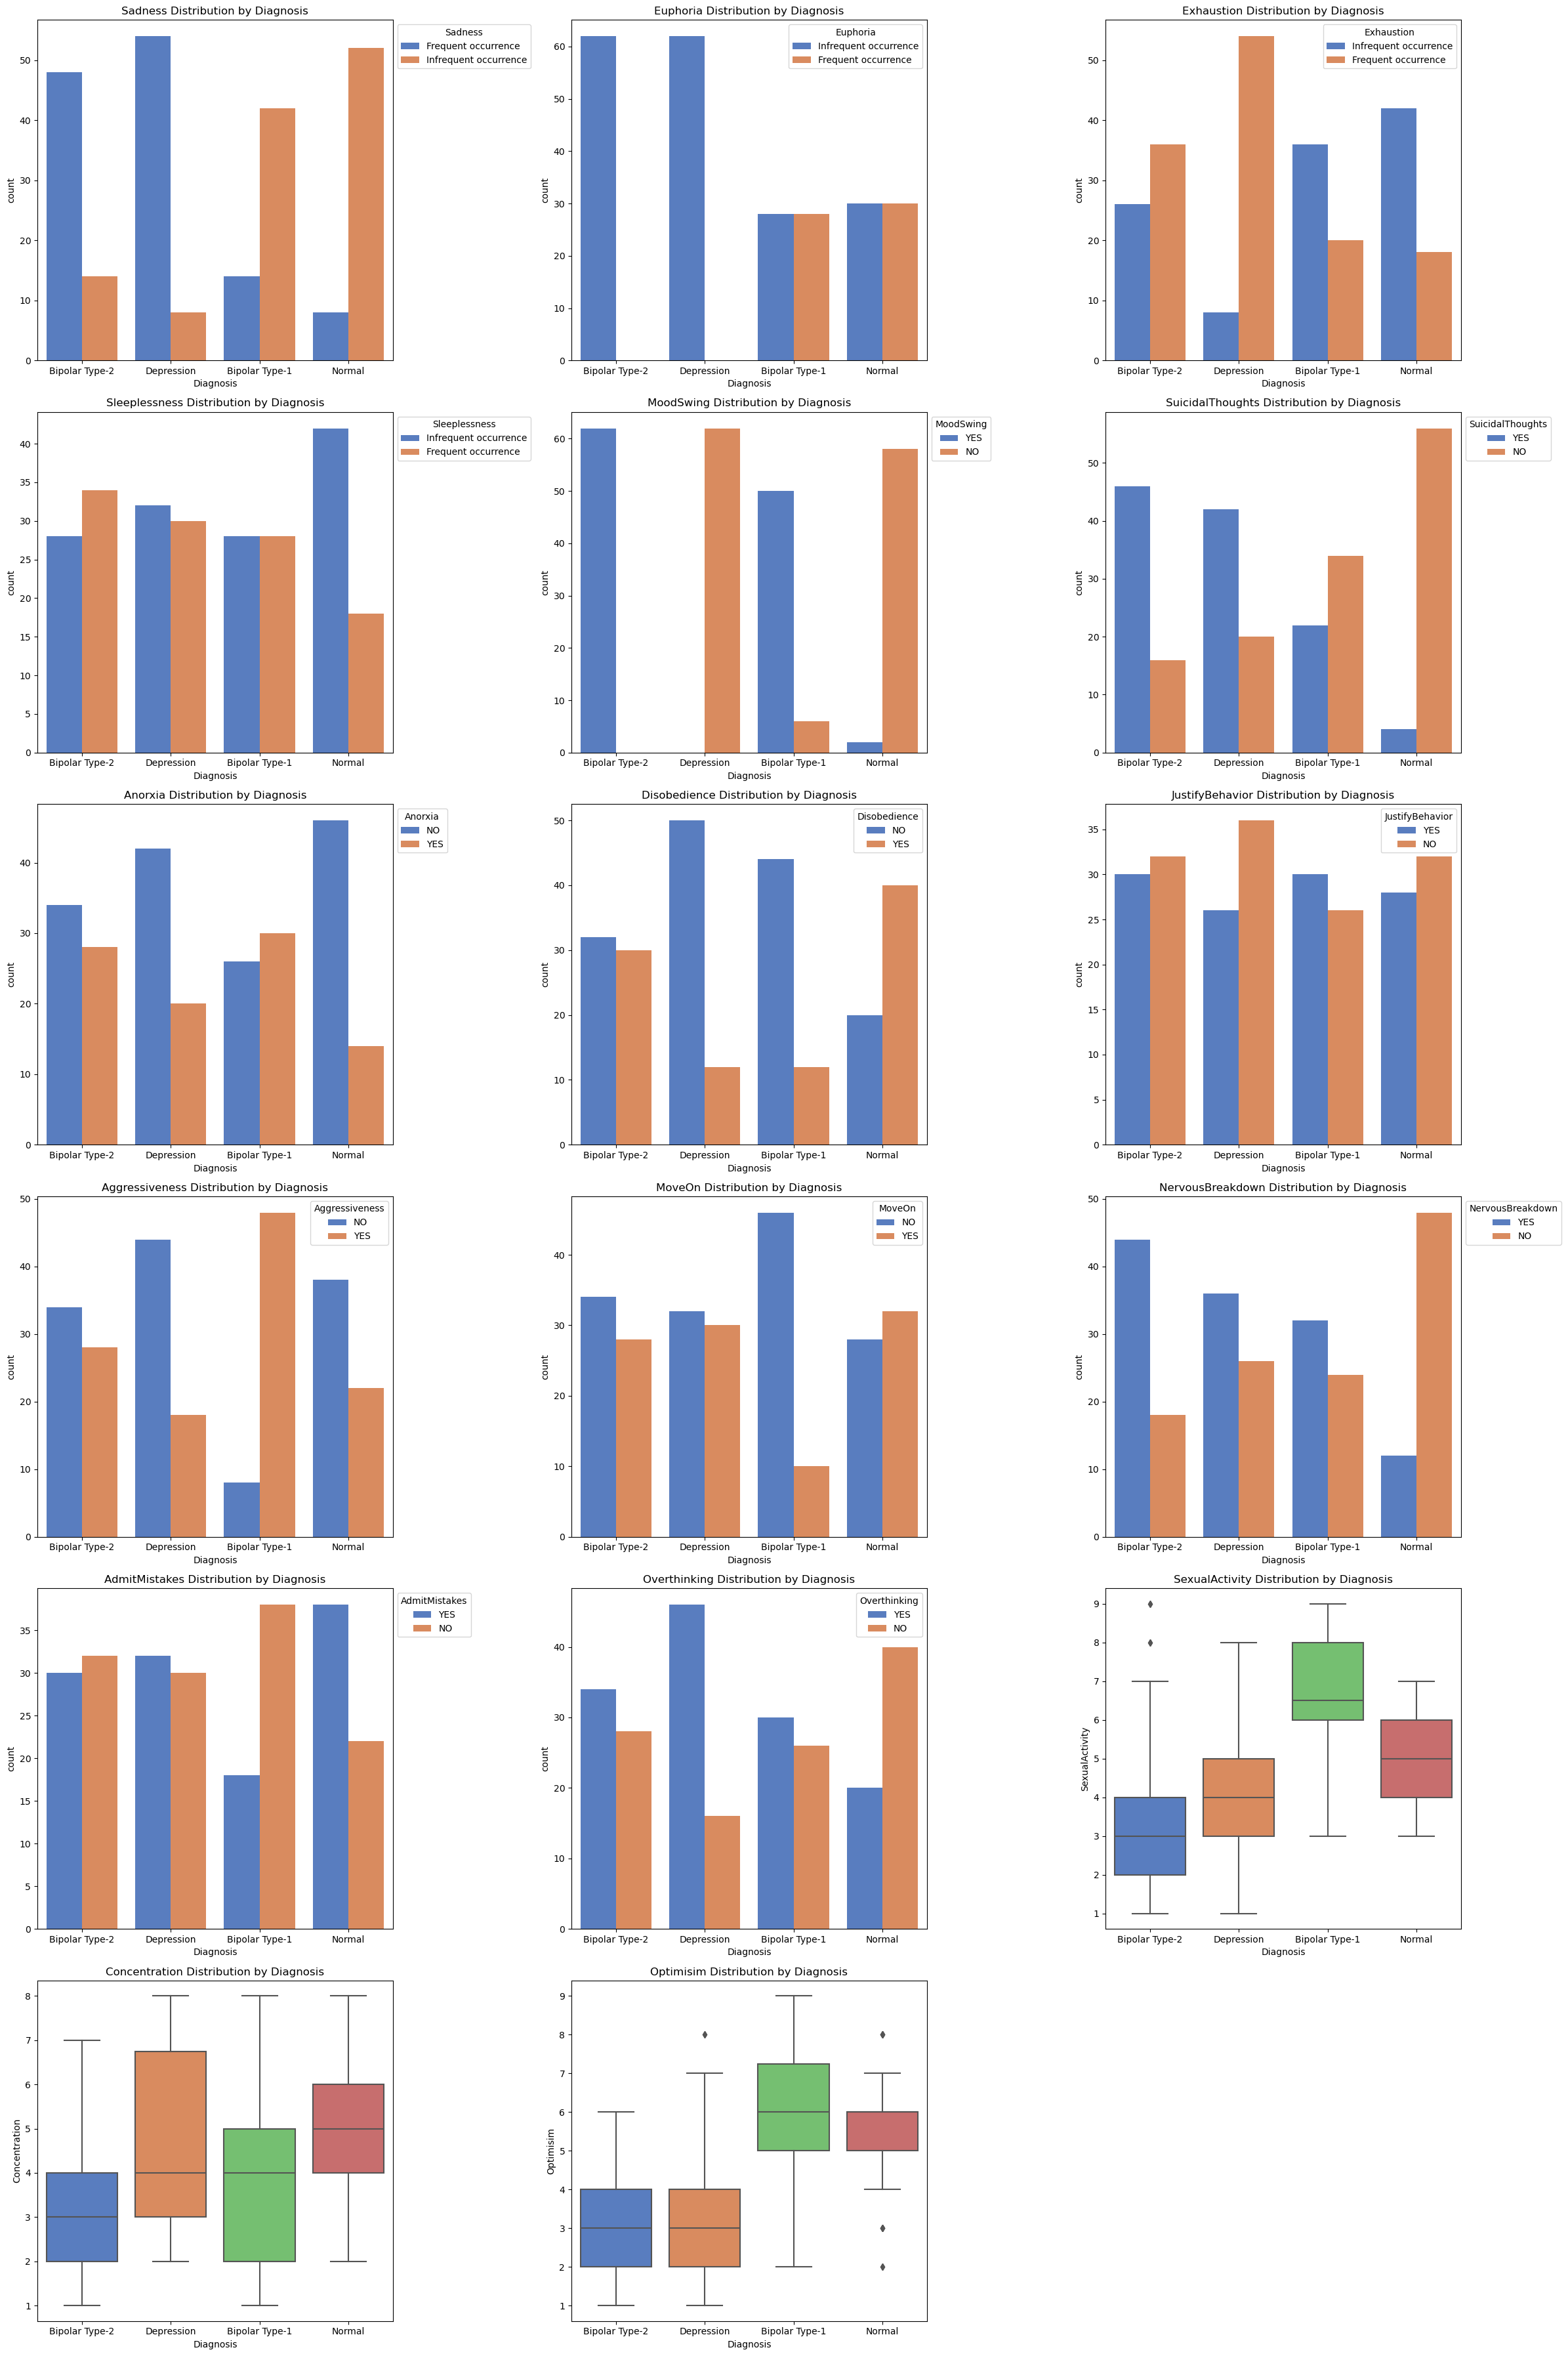

In [51]:
# Define the numerical and categorical features
numerical_features = ['SexualActivity', 'Concentration', 'Optimisim']
categorical_features = [
    'Sadness', 'Euphoria', 'Exhaustion', 'Sleeplessness', 'MoodSwing', 
    'SuicidalThoughts', 'Anorxia', 'Disobedience', 'JustifyBehavior', 
    'Aggressiveness', 'MoveOn', 'NervousBreakdown', 'AdmitMistakes', 
    'Overthinking'
]
target = 'Diagnosis'

# Define the plotting function for feature distributions
def plot_feature_distributions(data, categorical_features, numerical_features, target):
    # Calculate the total number of plots needed (one plot per feature)
    total_plots = len(categorical_features) + len(numerical_features)
    
    # Set the number of columns for subplots
    n_cols = 3
    
    # Calculate the total number of rows needed for subplots, rounding up
    n_rows = math.ceil(total_plots / n_cols)

    # Create a figure object with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    # Plot each categorical feature
    for i, feature in enumerate(categorical_features):
        sns.countplot(x=target, hue=feature, data=data, ax=axes[i], palette='muted')
        axes[i].set_title(f'{feature} Distribution by {target}')
        axes[i].legend(title=feature, bbox_to_anchor=(1, 1))
    
    # Plot each numerical feature
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=target, y=feature, data=data, ax=axes[i + len(categorical_features)], palette='muted')
        axes[i + len(categorical_features)].set_title(f'{feature} Distribution by {target}')
    
    # Hide any unused subplots
    for i in range(total_plots, n_rows * n_cols):
        axes[i].axis('off')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame and lists of features
plot_feature_distributions(data, categorical_features, numerical_features, target)


In [52]:
# Custom Transformer for Outlier Handling
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, n_std=3):
        self.n_std = n_std
    
    def fit(self, X, y=None):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    
    def transform(self, X, y=None):
        clipped_X = np.clip(X, self.mean_ - self.n_std * self.std_, self.mean_ + self.n_std * self.std_)
        return clipped_X

# Separate features and target variable
target_name = 'Diagnosis'
features = data.drop(columns=[target_name])
target = data[target_name]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=123)

# Preprocessors for numerical and categorical columns
numerical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_clipper', OutlierClipper(n_std=3)),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, selector(dtype_include=object)),
    ('standard_scaler', numerical_preprocessor, selector(dtype_exclude=object))
])

# Pipeline for Random Forest Classifier
rf_model = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))
# Fit the Random Forest model
rf_model.fit(X_train, y_train)
# Score the Random Forest model on the test set
rf_test_score = rf_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_score:.4f}")

# Pipeline for Extra Trees Classifier
et_model = make_pipeline(preprocessor, ExtraTreesClassifier(random_state=123))
# Fit the Extra Trees model
et_model.fit(X_train, y_train)
# Score the Extra Trees model on the test set
et_test_score = et_model.score(X_test, y_test)
print(f"Extra Trees Test Accuracy: {et_test_score:.4f}")





Random Forest Test Accuracy: 0.9667
Extra Trees Test Accuracy: 0.9333


In [53]:
# Cross-Validation for Model Evaluation

# Define scoring metrics for evaluation
scoring = {'accuracy': 'accuracy', 'precision': make_scorer(precision_score, average='weighted')}

# Random Forest model evaluation using cross-validation
rf_cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring)

# Extra Trees model evaluation using cross-validation
et_cv_results = cross_validate(et_model, X_train, y_train, cv=5, scoring=scoring)

# Display the results
print("Random Forest - CV Metrics:")
print(f"Accuracy: {np.mean(rf_cv_results['test_accuracy']):.4f}")
print(f"Precision: {np.mean(rf_cv_results['test_precision']):.4f}\n")

print("Extra Trees - CV Metrics:")
print(f"Accuracy: {np.mean(et_cv_results['test_accuracy']):.4f}")
print(f"Precision: {np.mean(et_cv_results['test_precision']):.4f}")


Random Forest - CV Metrics:
Accuracy: 0.9500
Precision: 0.9584

Extra Trees - CV Metrics:
Accuracy: 0.9389
Precision: 0.9493


In [54]:

# Make predictions with both models on the test set
rf_predictions = rf_model.predict(X_test)
et_predictions = et_model.predict(X_test)

# Confusion Matrix for Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Classification Report for Random Forest
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix for Extra Trees
print("\nExtra Trees - Confusion Matrix:")
print(confusion_matrix(y_test, et_predictions))

# Classification Report for Extra Trees
print("\nExtra Trees - Classification Report:")
print(classification_report(y_test, et_predictions))


Random Forest - Confusion Matrix:
[[12  0  0  0]
 [ 2 16  0  0]
 [ 0  0 16  0]
 [ 0  0  0 14]]

Random Forest - Classification Report:
                precision    recall  f1-score   support

Bipolar Type-1       0.86      1.00      0.92        12
Bipolar Type-2       1.00      0.89      0.94        18
    Depression       1.00      1.00      1.00        16
        Normal       1.00      1.00      1.00        14

      accuracy                           0.97        60
     macro avg       0.96      0.97      0.97        60
  weighted avg       0.97      0.97      0.97        60


Extra Trees - Confusion Matrix:
[[10  2  0  0]
 [ 2 16  0  0]
 [ 0  0 16  0]
 [ 0  0  0 14]]

Extra Trees - Classification Report:
                precision    recall  f1-score   support

Bipolar Type-1       0.83      0.83      0.83        12
Bipolar Type-2       0.89      0.89      0.89        18
    Depression       1.00      1.00      1.00        16
        Normal       1.00      1.00      1.00        14

